# Week 3 - Part 1
Reading: For this part, we'll read the remaining part of Network Science Chapter 3, Section 3.5 - 3.10, with *emphasis* on 3.8 and 3.9.



**Exercises: text answers**: 
Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.

- What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
- List the four regimes that characterize random networks as a function of ⟨k⟩
- According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

**Exercises: WS edition**
he next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using networkx, writing loops, and plotting nice figures.

- First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,
 and 1
- Calculate the average shortest path length ⟨d⟩
 for each one.
Describe what happens to the network when p=1
- Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.
- Let's investigate this behavior in detail. Generate 50 networks with N=500
, ⟨k⟩=4
, for each of p={0,0.01,0.03,0.05,0.1,0.2}
. Calculate the average of ⟨d⟩
 as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).
- Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

## Part 1 : text answers
- *What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?*
  - That there will be more clustering that is not taken into account in a random network. A random network's "model underestimates the size and the frequency of the high degree nodes". The random network predicts a lot more nodes close to <k>, but in reality a lot more nodes have higher degrees and lower degrees. Not a lot lie in the average.


- *List the four regimes that characterize random networks as a function of ⟨k⟩*
If ‹k› > 1 we have a large component.
  - Subcritical Regime:
    - $0< ‹k› < 1 (p < 1/N)$
    - For ‹k› = 0 the network consists of N isolated nodes
    - For ‹k› < 1 we observe many tiny clusters
  - Critical Point: 
    - $‹k› = 1 (p = 1/N)$
    - The critical point separates the regime where there is not yet a giant component (‹k› < 1) from the regime where there is one (‹k› > 1)
  - Supercritical Regime: 
    - $‹k› > 1 (p > 1/N)$
    - Now the network is a giant component that looks like a network
    - numerous isolated components coexist with the giant component.
    - The supercritical regime lasts until all nodes are absorbed by the giant component
  - Connected Regime: 
    - $‹k› > lnN (p > lnN/N)$
    - For sufficiently large p the giant component absorbs all nodes and components, hence NG≃ N
    - The network turns into a complete graph only at ‹k› = N - 1. But is sparse untill this point




- *According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) 
  - that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?*
In a random network when the average degree for the nodes decrese, then the clustering will decrese. as it has the same probability connecting to some node many steps away as to one of your neighbours or neighbours neighbours. But in a real life network connecting to a node that is your neighbour or neighbours neighbour still remains with high probability. So when the degree decreases there will still be clusters, as you will still connect to the same neighbours, just not as many connections.




## Part 1 : WS edition
he next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using networkx, writing loops, and plotting nice figures.

- First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,
 and 1
- Calculate the average shortest path length ⟨d⟩
 for each one.
Describe what happens to the network when p=1
- Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.
- Let's investigate this behavior in detail. Generate 50 networks with N=500
, ⟨k⟩=4
, for each of p={0,0.01,0.03,0.05,0.1,0.2}
. Calculate the average of ⟨d⟩
 as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).
- Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
n = 500
k = 4 # average degree, neighbours neighbour on each side
p = [0, 0.1, 1] # The probability of rewiring each edge

# create 3 graphs with different rewiring probabilities
G1 = nx.watts_strogatz_graph(n,k,p[0],seed=42)
G2 = nx.watts_strogatz_graph(n,k,p[1],seed=42)
G3 = nx.watts_strogatz_graph(n,k,p[2],seed=42)

# Calculate the average shortest path length ⟨d⟩ for each one
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)
d3 = nx.average_shortest_path_length(G3)

# Print the results
print(f"Average shortest path length for p={p[0]}: {d1}")
print(f"Average shortest path length for p={p[1]}: {d2}")
print(f"Average shortest path length for p={p[2]}: {d3}")

Average shortest path length for p=0: 62.875751503006015
Average shortest path length for p=0.1: 8.340905811623246
Average shortest path length for p=1: 4.726845691382765


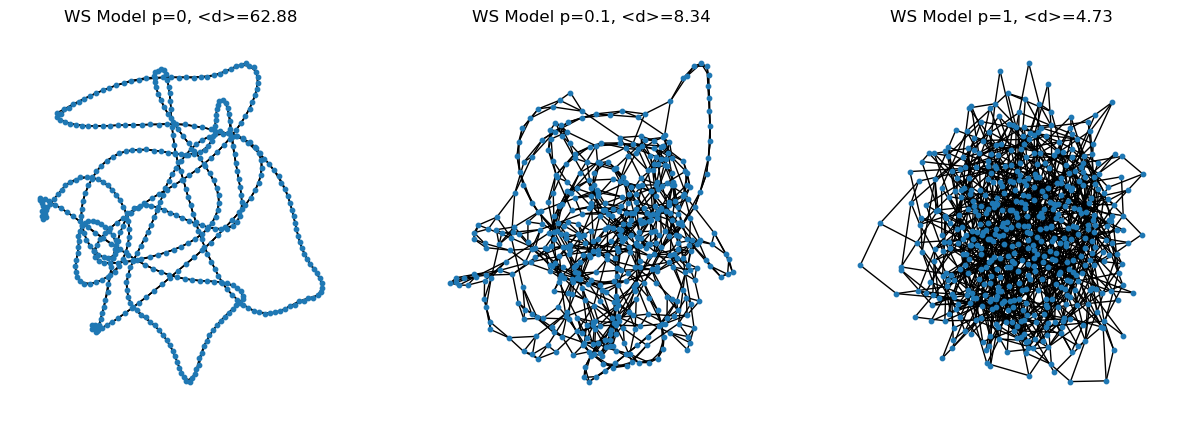

In [15]:

# plot the graphs
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
nx.draw(G1, node_size=10)
plt.title(f'WS Model p={p[0]}, <d>={d1:.2f}')
plt.subplot(1,3,2)
nx.draw(G2, node_size=10)
plt.title(f'WS Model p={p[1]}, <d>={d2:.2f}')
plt.subplot(1,3,3)
nx.draw(G3, node_size=10)
plt.title(f'WS Model p={p[2]}, <d>={d3:.2f}')
plt.show()

**Describe what happens to the network when p=1**

For p = 1 all links have been rewired, so the network turns into a random network (Box 3.9)

**Generate a lot of networks with different values of p**
You will notice that paths are short when p is close to one and they are long when p=0

- What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network (value of 4-6 (see chapter 3.8-3.9)).


In [20]:
# Generate a lot of networks with different values of p
p = np.linspace(0.1, 1, 20)
avg_path_lengths = []
for prob in p:
    G = nx.watts_strogatz_graph(n, k, prob, seed=42)
    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)


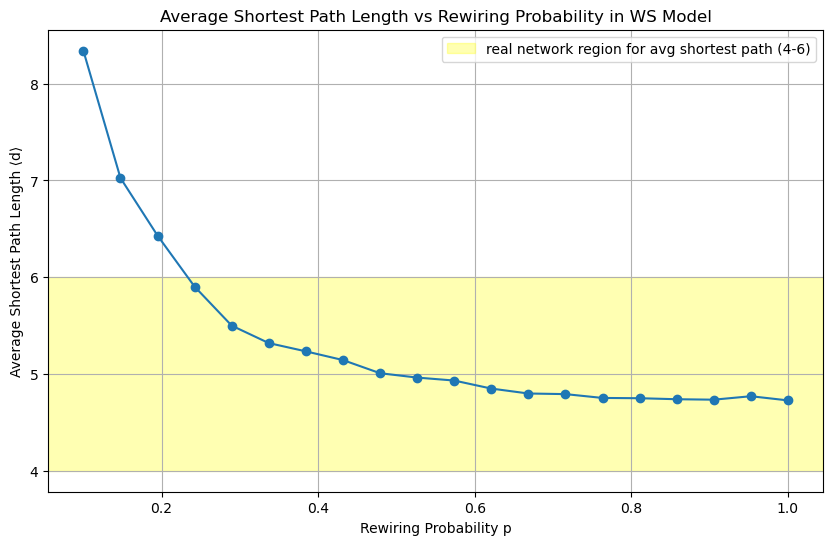

In [22]:
# Plot the average shortest path length as a function of p
plt.figure(figsize=(10, 6))
plt.plot(p, avg_path_lengths, marker='o')
plt.xlabel('Rewiring Probability p')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model')
plt.grid()

# Mark the area between 4 and 6
plt.axhspan(4, 6, color='yellow', alpha=0.3, label='real network region for avg shortest path (4-6)')
plt.legend()

plt.show()

**Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}**
Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.

In [ ]:
# Generate a lot of networks with different values of p
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_path_lengths = np.zeros((len(p), 50))
for idx, prob in enumerate(p):
    for i in range(50):
        G = nx.watts_strogatz_graph(n, k, prob, seed=None)
        avg_path_lengths[idx, i] = nx.average_shortest_path_length(G)

# Calculate mean and std deviation
mean_path_lengths = np.mean(avg_path_lengths, axis=1)
std_path_lengths = np.std(avg_path_lengths, axis=1)


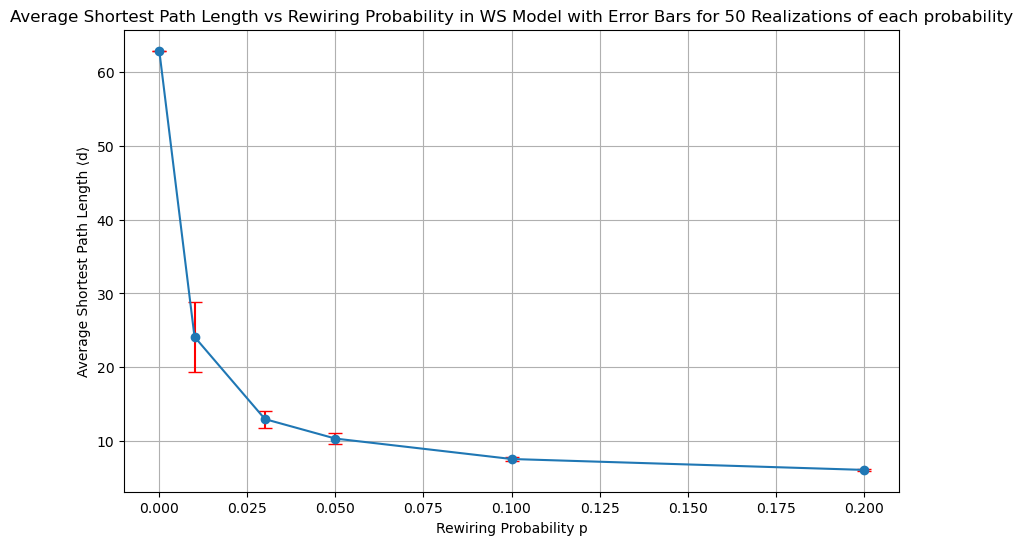

In [29]:

# Plot the average shortest path length as a function of p with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(p, mean_path_lengths, yerr=std_path_lengths, fmt='o-', capsize=5, ecolor='red')
plt.xlabel('Rewiring Probability p')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model with Error Bars for 50 Realizations of each probability')
plt.grid()
plt.show()

**FIGURE TEXT** Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

The x-axis are the 6 Rewirering probabilities p = [0, 0.01, 0.03, 0.05, 0.1, 0.2], and the y-axis is the average shortest path length between two random nodes. The blue dots indicates the mean of the average shortest paths, for the 50 realizations of the graphs for each p. 
In the graph above, the red lines indicates the standard deviation of the average shortest path, calculated based on the 50 realizations of a WS graph for each of the 5 probabilities. 

It is interesting to see that, the average drops drastically for a very small rewirering probability. So when we introduce a tiny bit of "randomness" on 1%, the average shortest distance (ASD) decreses by half. The standard deviation decreses a lot as the probabilities increases, as we get closer and closer to a fully random network. Even though this is the observation here, we expect the clustering coefficient to still be high, and therefore not represent a random network. With even a small amount of pertubations of the links we gain acces to different places in the cluster, and therefore deminish the shortest destance to nodes further away.